In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.interpolate import CubicSpline

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: Miguel Angel Perdomo Gaitan
---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y encuentre $f'(\pi/8)$ variando el $h$ y encuentre el error de convergencia, comparando su respuesta con el valor exacto.

* Determine $f''(\pi/8)$ con $h = 0.05$ y encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



In [2]:
import numpy as np

def derivada_cinco_puntos(f, x, h):
    """
    Calcula la derivada de cinco puntos para una función f en un conjunto de puntos x con paso h.

    Parámetros:
    - f: función a derivar (función de Python)
    - x: punto o array de puntos donde evaluar la derivada.
    - h: paso entre puntos (diferente de cero y positivo)

    Retorna:
    - Derivada(s) aproximada(s) en los puntos de x (escalar o array)
    """
    if h <= 0:
        raise ValueError("h debe ser positivo y diferente de cero")
    if not callable(f):
        raise TypeError("La función ingresada no es una función de Python")

    # Detectar si x es escalar para manejar ambos casos
    escalar = np.isscalar(x)
    x = np.atleast_1d(x)
    n = len(x)

    # Caso: un solo punto
    if n == 1:
        xi = x[0]
        return (f(xi - 2*h) - 8*f(xi - h) + 8*f(xi + h) - f(xi + 2*h)) / (12*h)

    # Caso: varios puntos
    fprime = np.zeros_like(x)
    for i in range(n):
        xi = x[i]
        if i == 0:
            fprime[i] = (-25*f(xi) + 48*f(xi + h) - 36*f(xi + 2*h) + 16*f(xi + 3*h) - 3*f(xi + 4*h)) / (12*h)
        elif i == n - 1:
            fprime[i] = (25*f(xi) - 48*f(xi - h) + 36*f(xi - 2*h) - 16*f(xi - 3*h) + 3*f(xi - 4*h)) / (12*h)
        else:
            fprime[i] = (f(xi - 2*h) - 8*f(xi - h) + 8*f(xi + h) - f(xi + 2*h)) / (12*h)

    return fprime if not escalar else fprime[0]


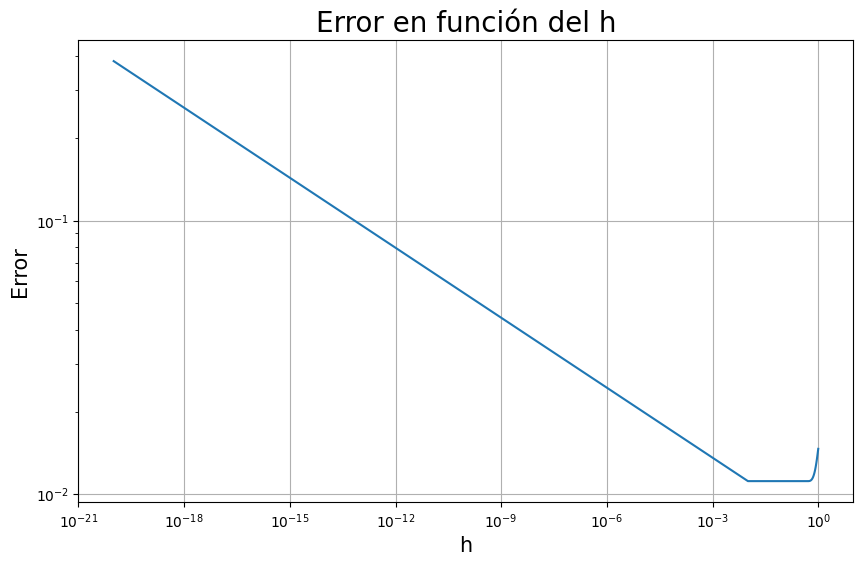

In [3]:
#declaración función
f=lambda x: np.cos(x)
#array con 10 datos equidistantes
x=np.linspace(0,2*np.pi,10)
#evaluar la función en esos puntos
puntos=f(x)
#interpolar usando CubicSpline
poly_Cubic=CubicSpline(x,f(x))
punto=np.pi/8 #punto a evaluar
#se usa la derivada se cinco puntos
#array de varios h
hs=np.linspace(1e-20,1,100)
#array con derivadas
derivadas=[]
#derivada con varios hs
for h in hs:
    derivada=derivada_cinco_puntos(poly_Cubic,punto,h)
    derivadas.append(derivada)
#se determina el error conociendo el valor real
fprime=lambda x: -np.sin(x) #derivada de coseno
derivada_exacta=fprime(punto) #derivada exacta en el punto
errores=[]
for derivada in derivadas:
    diferencia=abs(derivada_exacta-derivada)
    errores.append(diferencia)
#se grafica el error
plt.figure(figsize=(10,6))
plt.plot(hs,errores)
plt.title("Error en función del h", fontsize=20)
plt.xlabel("h", fontsize=15)
plt.xscale("log")
plt.ylabel("Error", fontsize=15)
plt.yscale("log")
plt.grid()
plt.show()

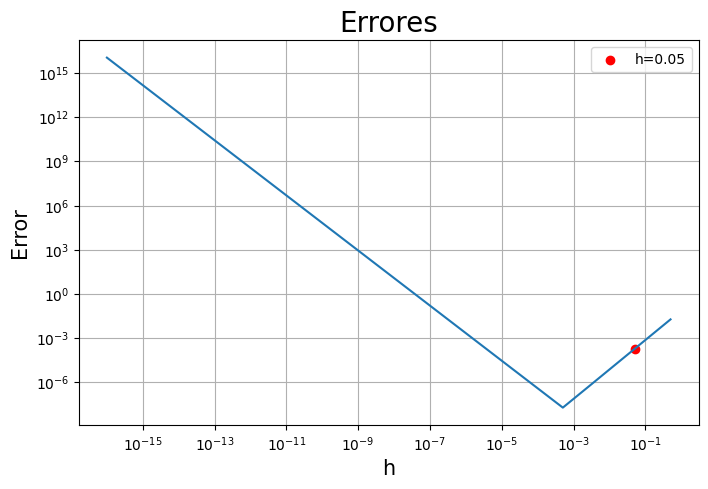

In [4]:
#se determina la segunda derivada
punto=np.pi/8 #punto a evaluar al derivada
g=lambda x: np.cos(x) #función a derivar
def segunda_derivada (f,x,h):
  '''
  Aproxima la segunda derivada de f en x usando la diferencia finita centrada.
  f: función
  x: punto en el que se quiere calcular la derivada
  h: paso de discretización
  return: segunda derivada de f en x
  '''
  return (f(x + h) - 2 * f(x) + f(x - h)) / (h**2)
t=sp.symbols("t") #declaración variable simbólica
f=sp.cos(t) #función dada de manera simbólica
segunda_derivada_f=sp.diff(f,t,2) #segunda derivada
segunda_derivada_lambda=sp.lambdify(t,segunda_derivada_f) #se pasa a una función tipo lambda
derivada_exacta=segunda_derivada_lambda(punto) #se evalua la derivada exacta en el punto 
hs=np.linspace(1e-16,0.5,1000) #se crea un arreglo de h´s.
errores=[] #se crea una lista donde guardar los errores
for h in hs:
    error=abs(derivada_exacta-segunda_derivada(g,punto,h))
    errores.append(error)
#se evalua en h=0.05
segunda_derivada_num=segunda_derivada(g,punto,0.05)
error=abs(derivada_exacta-segunda_derivada_num)
#se grafica
plt.figure(figsize=(8,5))
plt.plot(hs,errores) #todos los errores
plt.scatter(0.05,error, label="h=0.05",color="red") #error h=0.05
plt.yscale("log")
plt.xscale("log")
plt.xlabel("h",fontsize=15)
plt.ylabel("Error",fontsize=15)
plt.title("Errores",fontsize=20)
plt.grid()
plt.legend()
plt.show()

Como se puede ver en la gráfica, llega un punto en el cual el error es mínimo y luego vuelve a aumentar, por tanto, un h más pequeño no implica una mayor precisión, es necesario, elegir un h adecuado que mínimice el error.

# 2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`. Realice un gráfico logaritmico de los errores.

*   ¿Cuál será el valor óptimo de $h$?

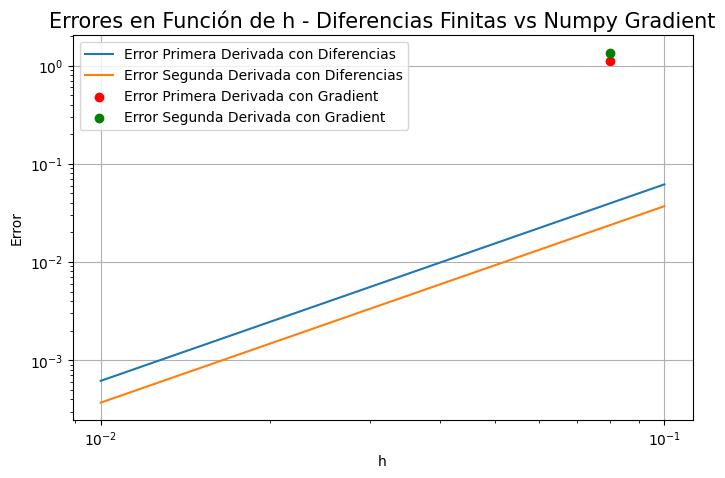

In [32]:
#se escribe la función
f=lambda x: x*(np.exp(x))
punto=2 #punto a evaluar la derivada
t=sp.symbols("t") #declaración de variable simbólica
g= t*(sp.exp(t)) #función simbólica
derivada_exacta=sp.diff(g,t) #se determina la derivada exacta
derivada_exacta_lambda=sp.lambdify(t,derivada_exacta) #se pasa la función simbólica a una tipo lambda
derivada_punto_exacta=derivada_exacta_lambda(punto) #se evalua la derivada en el punto
x=np.linspace(1.8,2.2,6) #arreglo de datos entre 1.8 y 2.2
segunda_derivada_exacta=sp.diff(g,t,2)
segunda_derivada_exacta_lambda=sp.lambdify(t,segunda_derivada_exacta)
segunda_derivada_exacta_punto=segunda_derivada_exacta_lambda(punto)
def centered_diff(f, x, h):
  '''
  Aproxima la primera derivada de f en x usando la diferencia finita centrada.
  f: función
  x: punto en el que se quiere calcular la derivada
  h: paso de discretización
  return: primera derivada de f en x
  '''
  return (f(x + h) - f(x - h)) / (2 * h)
def segunda_derivada (f,x,h):
  '''
  Aproxima la segunda derivada de f en x usando la diferencia finita centrada.
  f: función
  x: punto en el que se quiere calcular la derivada
  h: paso de discretización
  return: segunda derivada de f en x
  '''
  return (f(x + h) - 2 * f(x) + f(x - h)) / (h**2)
hs=np.linspace(0.01,0.1,10) #arreglo de hs
errores_1=[] #lista donde se guardarán los errores de la primera derivada
errores_2=[] #lista donde se guardarán los errores de la segunda derivada
derivadas_1=[] #lista a guardar la primera derivada
derivadas_2=[] #lista a guardar segunda derivada
#se crea un ciclo for para guardar la derivada y el error 
for h in hs:
    derivada_1=centered_diff(f,punto,h)
    derivadas_1.append(derivada_1)
    error_1=abs(derivada_punto_exacta-derivada_1)
    errores_1.append(error_1)
    derivada_2=segunda_derivada(f,punto,h)
    error_2=abs(segunda_derivada_exacta_punto- derivada_2)
    derivadas_2.append(derivada_2)
    errores_2.append(error_2)
#se determina la derivada y error usando gradient
# Derivadas con gradient
primera_derivada_numpy = np.gradient(f(x), x)
segunda_derivada_numpy = np.gradient(primera_derivada_numpy, x)
# Índice más cercano a 2
indice = np.argmin(abs(x - punto))
# Errores puntuales
error_numpy_1 = abs(derivada_punto_exacta - primera_derivada_numpy[indice])
error_numpy_2 = abs(segunda_derivada_exacta_punto - segunda_derivada_numpy[indice])
# h usado por gradient (distancia entre puntos consecutivos)
h_numpy = x[1] - x[0]
# Gráfica
plt.figure(figsize=(8,5))
plt.plot(hs, errores_1, label="Error Primera Derivada con Diferencias")
plt.plot(hs, errores_2, label="Error Segunda Derivada con Diferencias")
plt.scatter(h_numpy, error_numpy_1, label="Error Primera Derivada con Gradient", color='red')
plt.scatter(h_numpy, error_numpy_2, label="Error Segunda Derivada con Gradient", color='green')
plt.legend()
plt.title("Errores en Función de h - Diferencias Finitas vs Numpy Gradient", fontsize=15)
plt.xlabel("h", fontsize=10)
plt.xscale("log")
plt.yscale("log")
plt.ylabel("Error", fontsize=10)
plt.grid()
plt.show()
#Nota: No encontré alguna función de Scipy que determine la derivada

El mejor h sería h=0.01  puesto que mínimiza el error. Adicionalmente, con gradient el error aumenta considerablemente.